Name: T.L. James (replace with your full name)

Assignment: Stable Diffusion, change prompts and parameters.

Recommended to change runtime to GPUs.

Tutorial found here: https://keras.io/keras_hub/guides/stable_diffusion_3_in_keras_hub/

In [1]:
!pip install -Uq keras # installs or updates Keras, a DL library for python
!pip install -Uq git+https://github.com/keras-team/keras-hub.git # installs latest vs of Keras Hub from GitHub
!wget -O mountain_dog.png https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog.png # downloads an image file from the Keras GitHub
!wget -O mountain_dog_mask.png https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog_mask.png # downloads a mask image file from Keras GitHub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
--2024-12-03 20:07:17--  https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecti

In [2]:
import os # imports OS module to interact with operating system

os.environ["KERAS_BACKEND"] = "jax" # sets Keras backend to use JAX, library for high performance numerical computing and ML

import time # imports time module for measuring intervals and delays in code

import keras # imports main Keras library for building and training DL models
import keras_hub # imports the keras_hub module for providing access to Keras models and tools
import matplotlib.pyplot as plt # imports the matplotlib library to create visualizations
import numpy as np # imports the numpy library for numerical operations and handling arrays
from PIL import Image # imports teh image module from PYthon Imaging Library to process images and manipulation

In [3]:
def display_generated_images(images):
    """Helper function to display the images from the inputs.

    This function accepts the following input formats:
    - 3D numpy array.
    - 4D numpy array: concatenated horizontally.
    - List of 3D numpy arrays: concatenated horizontally.
    """
    display_image = None
    # inits a placeholder for final image to be displayed
    if isinstance(images, np.ndarray): # checks if input is numpy array
        if images.ndim == 3: # handles a 3D array (1 image)
            display_image = Image.fromarray(images)
        elif images.ndim == 4: # handles a 4D array (multiple images) by concatenating horizontally
            concated_images = np.concatenate(list(images), axis=1)
            display_image = Image.fromarray(concated_images)
    elif isinstance(images, list): # checks if input is list of 3D NumPy arrays and concatenates them horizontally
        concated_images = np.concatenate(images, axis=1)
        display_image = Image.fromarray(concated_images)

    if display_image is None: # sends error message if input format not supported
        raise ValueError("Unsupported input format.")

    plt.figure(figsize=(10, 10)) # sets up matplotlib figure for displaying image
    plt.axis("off") # turns off axis
    plt.imshow(display_image) # displays image
    plt.show() # shows image
    plt.close() # closes plots


backbone = keras_hub.models.StableDiffusion3Backbone.from_preset(
    "stable_diffusion_3_medium", image_shape=(512, 512, 3), dtype="float16"
) # loads stable diffusion 3 medium model with preset config, specifies input shape with 3 channels and data type
preprocessor = keras_hub.models.StableDiffusion3TextToImagePreprocessor.from_preset(
    "stable_diffusion_3_medium"
) # loads preprocessor for converting text prompts into sutiable format for SD3 model
text_to_image = keras_hub.models.StableDiffusion3TextToImage(backbone, preprocessor) # combines backbone and preprocessor into text-image generation model

100%|██████████| 3.07k/3.07k [00:00<00:00, 6.89MB/s]


100%|██████████| 5.57G/5.57G [02:24<00:00, 41.4MB/s]


100%|██████████| 4.08k/4.08k [00:00<00:00, 4.45MB/s]


100%|██████████| 976k/976k [00:00<00:00, 2.59MB/s]


100%|██████████| 512k/512k [00:00<00:00, 1.65MB/s]


100%|██████████| 976k/976k [00:00<00:00, 2.52MB/s]


100%|██████████| 512k/512k [00:00<00:00, 1.62MB/s]


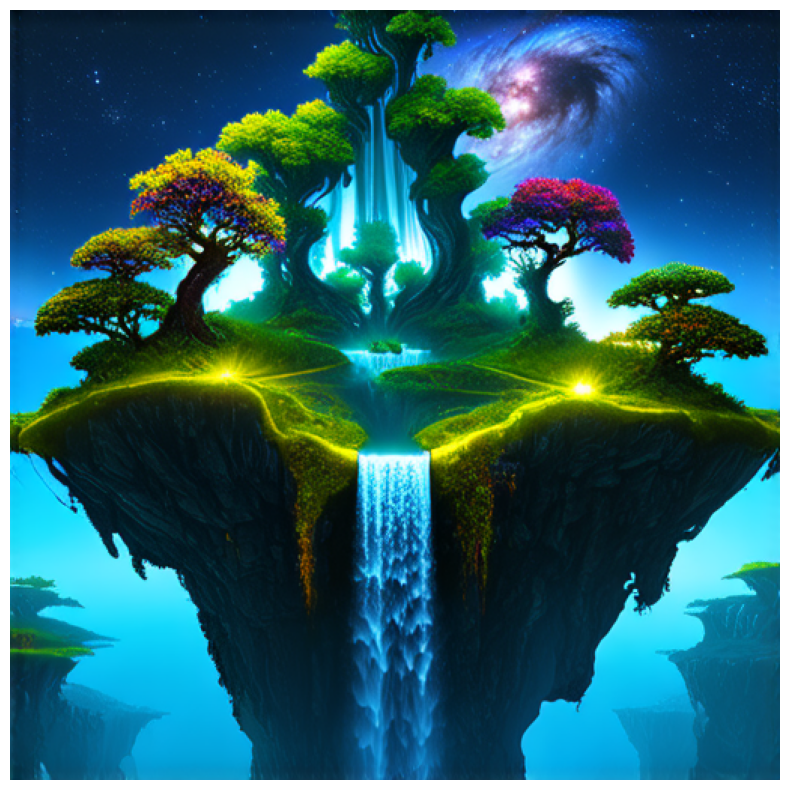

In [15]:
prompt = "Floating islands with waterfalls flowing upward, surreal dreamscape, glowing trees, cosmic background"

generated_image = text_to_image.generate(prompt)
display_generated_images(generated_image)

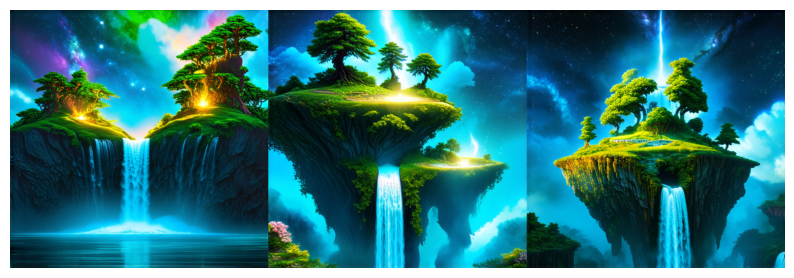

In [16]:
generated_images = text_to_image.generate([prompt] * 3) # generates 3 images using text-image model, variations of the above prompt
display_generated_images(generated_images) # shows generated images and concatenates horizontally

Cost time (`num_steps=10`): 3.85s
Cost time (`num_steps=28`): 10.00s
Cost time (`num_steps=50`): 18.24s


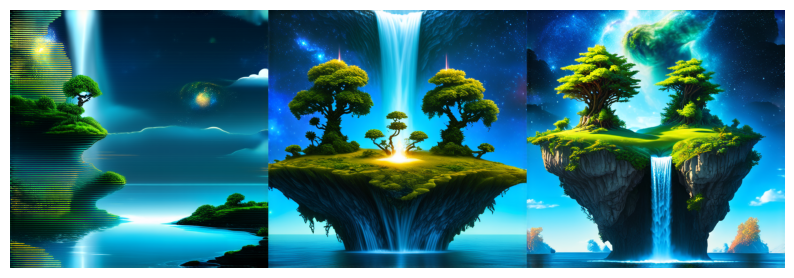

In [17]:
num_steps = [10, 28, 50] # defines list of step counts for generating images, step counts controls number of iterations to refine image
generated_images = [] # inits an empty list to store generated images
for n in num_steps: # iterates through each value
    st = time.time() # recored current time to measure how long for each image to generate
    generated_images.append(text_to_image.generate(prompt, num_steps=n)) # genrates image with specified number of steps, apends to empty list
    print(f"Cost time (`num_steps={n}`): {time.time() - st:.2f}s") # prints the statement with the numer of steps and how long

display_generated_images(generated_images) # shows the displayed images

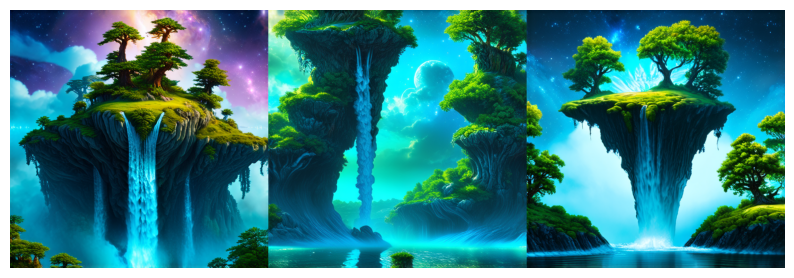

In [18]:
generated_images = text_to_image.generate(
    {
        "prompts": [prompt] * 3, # list of 3 identical prompts that creates 3 variations of same image
        "negative_prompts": ["Red color"] * 3, # list of 3 identical negative prompts asking it to avoid the color red (negative tells what to avoid and positive tells what to include )
    }
)
display_generated_images(generated_images) # displays the 3 generated images horizontally

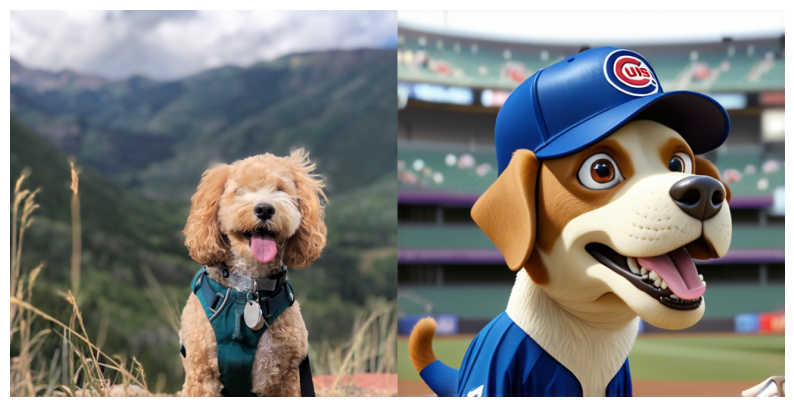

In [22]:
image_to_image = keras_hub.models.StableDiffusion3ImageToImage(backbone, preprocessor) # init a image-image generation model using backbone and preprocessor

image = Image.open("mountain_dog.png").convert("RGB") # opens image file and ensures in RGB format
image = image.resize((512, 512)) # resizes image to match models input dimensions
width, height = image.size # stores dimensions of resized image

# Note that the values of the image must be in the range of [-1.0, 1.0].
rescale = keras.layers.Rescaling(scale=1 / 127.5, offset=-1.0) # creates a rescaling layer to normalize the pixel values of image
image_array = rescale(np.array(image)) # converts PIL Image into NumPy array and applies rescaling

prompt = "dog baseball player, Chicago Cubs, exaggerated features, cartoon style, oversized baseball cap, playful Pixar look" # creates descriptive prompt for transformation of image

generated_image = image_to_image.generate(
    {
        "images": image_array, # supplies preprocessed image to model
        "prompts": prompt, # provides prompts for transforming
    }
)
display_generated_images(
    [
        np.array(image), # original input image in NumPy array
        generated_image, # transformed/generated image
    ]
) # displays image side by side

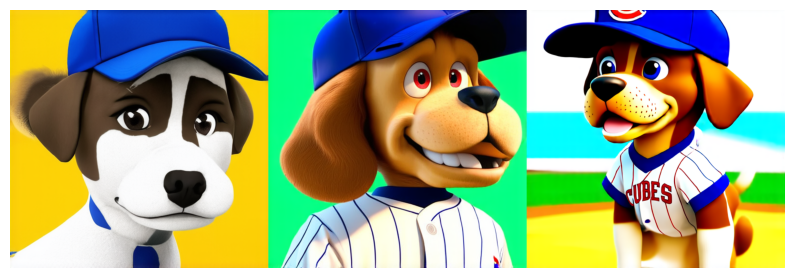

In [24]:
generated_images = [
    text_to_image.generate(prompt, guidance_scale=2.5), # generates an image using the prompt with low guidance scale  (lower allows more creative )
    text_to_image.generate(prompt, guidance_scale=7.0), # generates an image using the prompt with medium guidance scale  (medium allows some artistic variation )
    text_to_image.generate(prompt, guidance_scale=10.5), # generates an image using the prompt with high guidance scale  (higher makes model strictly follow prompt )
]
display_generated_images(generated_images) # displays generated images side by side

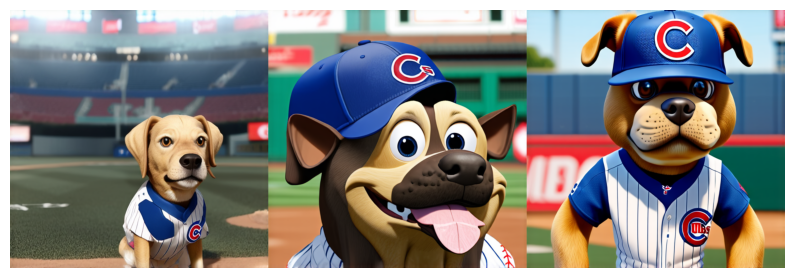

In [25]:
generated_images = [
    image_to_image.generate(
        {
            "images": image_array, # supplies input image, preprocessed and normalized
            "prompts": prompt, # supplies the descriptive prompt for transformation
        },
        strength=0.7, # specifies strength parameter as 0.7, lower strength allows model to incroporate more or original image
    ),
    image_to_image.generate(
        {
            "images": image_array, # supplies input image, preprocessed and normalized
            "prompts": prompt, # supplies the descriptive prompt for transformation
        },
        strength=0.8, # specifies strength parameter as 0.8, medium strenght balances infleunce of original image and prompt
    ),
    image_to_image.generate(
        {
            "images": image_array, # supplies input image, preprocessed and normalized
            "prompts": prompt, # supplies the descriptive prompt for transformation
        },
        strength=0.9, # specifies strength parameter as 0.9, higher strength makes output adhere to prompt more and less to original image
    ),
]
display_generated_images(generated_images) # displays images

In [ ]:
inpaint = keras_hub.models.StableDiffusion3Inpaint(backbone, preprocessor) # inits the inpainting model using backbone and preprocessor

image = Image.open("mountain_dog.png").convert("RGB") # opens input image and snures in RGB format
image = image.resize((512, 512)) # resizes iamge to match model expected dimensions
image_array = rescale(np.array(image)) # converts image into NumPy array and normalzies pixel value

# Note that the mask values are of boolean dtype.
mask = Image.open("mountain_dog_mask.png").convert("L") # open mask file and converts to L aka grey scale
mask = mask.resize((512, 512)) # resizes mask to match image input dimensions
mask_array = np.array(mask).astype("bool") # converts mask to NumPy array of boolean value

prompt = "a purple jaguar with glowing red eyes, hungry, hunting, highly "
prompt += "detailed, 8k" # creates descriptive prompt for content in inpainted region

generated_image = inpaint.generate(
    {
        "images": image_array, # supplies normalized input image
        "masks": mask_array, # inpits mask defining regions to modify
        "prompts": prompt, # inputs descriptive pormpt for modifying image
    }
)
display_generated_images( # displays original image, mask, and transformed image
    [
        np.array(image),
        np.array(mask.convert("RGB")),
        generated_image,
    ]
)